In [7]:
from sklearn.datasets import fetch_openml
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


### Load the data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False) 
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]

### Clustering

In [ ]:
cluster_nums = [8,9,10,11,12]
silh_scores = []

for k in cluster_nums:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    s_score = silhouette_score(X, kmeans.labels_)
    silh_scores.append(s_score)
    
print("Silhouette score list:", silh_scores)

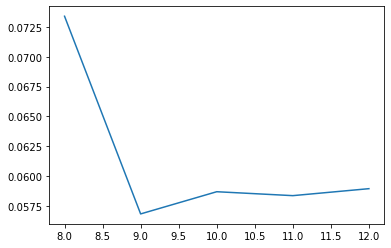

In [8]:
plt.plot(cluster_nums, silh_scores)

In [9]:
kmeans10 = KMeans(n_clusters=10, random_state=42)
y_pred10 = kmeans.fit_predict(X)

conf_matrix10 = confusion_matrix(y, y_pred10)

In [10]:
conf_matrix10

array([[  73,   24,   23, 2991, 3049,  130,   20,  347,   15,    1,   14,
         216],
       [   9,    6,    6,    0,    0,    5,   10,   14,    9, 4315, 3492,
          11],
       [ 190,  207,   72,  109,   13,   68, 4897,  212,   50,  339,  483,
         350],
       [1186,  111,   53,  103,   16,   17,  266,  150,  141,  370,   87,
        4641],
       [   5, 2585, 1815,   12,    3,  110,   18,  207, 1765,   96,  208,
           0],
       [1494,  280,  490,  178,   64,   43,    9,  687,  268,  127,  601,
        2072],
       [  11,   61,    2,   88,   59, 3172,   22, 3283,    5,   63,   80,
          30],
       [   8,  779, 3025,   12,   10,    3,   42,    3, 2893,  238,  277,
           3],
       [4047,  149,  253,   37,   40,   40,   59,   80,  161,  260,  398,
        1301],
       [  48, 1918, 1813,   26,   29,   12,    9,   10, 2783,  142,   76,
          92],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  

#### 3.5 Find max value idx of each row

In [16]:
max_val_idxs = []
for row in conf_matrix10:
    idx = np.argmax(row)
    max_val_idxs.append(idx)

# without duplicates 
no_dupl_min_vals = set(max_val_idxs)

In [17]:
no_dupl_min_vals

{0, 1, 2, 4, 6, 7, 8, 9, 11}

### DBSCAN

In [34]:
norm_val = []

for i in range(300):
    for j in range(300):
        if i == j:
            continue
        norm_val.append(np.linalg.norm(X[i] - X[j]))

In [44]:
norm_val_sorted = np.unique(np.sort(norm_val))
dist = norm_val_sorted[:10]
print(dist)

[419.58312645 524.32528072 636.2460216  638.28990279 638.45203422
 653.34753386 669.58270587 703.489872   723.56133119 739.42004301]


In [49]:
s = dist[:3].mean()
s

526.7181429215666

In [ ]:
# krok co 
eps_list = [s for x in range()]